<img src="../logo.png" height="200" width="900"> 

# <center> Сбор данных: грязная работа руками API </center>

[В документации](https://vk.com/dev/manuals) очень подробно описано какие есть методы и какие у них бывают параметры.

In [1]:
import requests

version = '5.103' 

with open('token.txt') as f:
    token = f.read()
    
def vk_download(method, parameters):
    
    url = 'https://api.vk.com/method/' + method + '?' + parameters + '&access_token=' + token + '&v=' + version
    response = requests.get(url) 
    infa = response.json()
    return infa

vk_download('users.get','user_ids=6045249')

{'response': [{'id': 6045249,
   'first_name': 'Филипп',
   'last_name': 'Ульянкин',
   'is_closed': False,
   'can_access_closed': True}]}

# 2. Какая мудрость мудрее

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её не грех репостнуть на стенку. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она буде репостнута повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы репостить. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

Гипотеза сформулирована. Глаза загорелись. В течение нашего курса мы обязательно её проверим. Сейчас же нас интересуют данные для её проверки. Давайте выберем какой-нибудь [мудрый паблик](https://vk.com/ooioioioioioo) и скачаем с него информацию по всем цитаткам. 

Отметим, что при этом есть одна тонкость, которая прописана в описании метода `wall.get`. Если мы хотим вытащить записи из группы, то ее id должен быть записан со знаком минус.

In [5]:
group_id = '-26610299'

wall = vk_download('wall.get','owner_id=' + group_id)['response']
wall.keys()

dict_keys(['count', 'items'])

In [6]:
wall['count']

10002

In [8]:
len(wall['items'])

20

In [10]:
from tqdm import tqdm_notebook
import time

n = vk_download('wall.get','owner_id=' + group_id)['response']['count']
n

10002

In [11]:
n//100

100

In [22]:
infa = { 
    'id': [ ],
    'text': [ ],
    'likes': [ ]
}

for i in tqdm_notebook(range(0, 1000, 100)):
    time.sleep(0.4)
    wall = vk_download('wall.get','owner_id=' + group_id + \
                       '&count=100&offset=' + str(i)
                      )['response']['items']
    
    infa['likes'].extend([item['likes']['count'] for item in wall])
    infa['id'].extend([item['id'] for item in wall])
    infa['text'].extend([item['text'] for item in wall])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


In [24]:
len(infa['id'])

1000

In [25]:
import pandas as pd
df =pd.DataFrame(infa)
df.head()

,id,text,likes
0,52993,"10 книг, которые стоит взять в отпуск или на д...",23
1,52992,"Кто сказал, что перемены должны отнимать много...",12
2,52977,Среди невзрачных чаще всего и попадаются манья...,243
3,52976,"Камилла Трейнор вздохнула, как будто вежливо о...",271
4,52975,"Татьяна Александровна сказала про меня, что он...",213


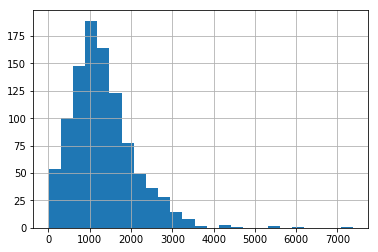

In [27]:
df.likes.hist(bins=25);

In [28]:
df.to_csv('wise.tsv', sep='\t', index=None)

# Почиташки

* [Немного устаревший туториал по vk API](https://nbviewer.jupyter.org/github/FUlyankin/ekanam_grand_research/blob/master/0.%20vk_parser_tutorial.ipynb)

<img src="pictures/timesleep.jpeg" height="200" width="400">  


<img src="pictures/cats.jpg" height="200" width="1200">  